# **ANÁLISIS DE CONTRASEÑAS MENEATE**

### **Grupo:** 22  **Grupo Clase:** 85
 **Nombre:** Aitana Antonia Ortiz Guiño  
 **NIA:** 100472097  

 **Nombre:** Alba Vidales Casado  
 **NIA:** 100472236  


**MODELO ORDENADOR EN EL QUE SE EJECUTO LA PRÁCTICA**:

Este cuaderno proporciona un análisis detallado de las contraseñas rotas, incluyendo:
- Identificación de contraseñas repetidas por pareja {Usuario, Contraseña}
- Distribución de longitudes de contraseñas
- Análisis de caracteres especiales en las contraseñas
- Identificación de contraseñas repetidas {Contraseña}
- Tiempo de ejecución para cada método de crackeo


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

## Carga de datos
Cargar los datos de las contraseñas rotas desde el archivo de salida generado y analizarlos en un DataFrame.

In [4]:
# Cargar los datos de las contraseñas rotas
data_file = 'outputs/passwords_cracked_meneate.txt'

# Leer los datos en un DataFrame, cada fila representa un par usuario-contraseña
passwords = []
with open(data_file, 'r', encoding='utf-8') as file:
    for line in file:
        if ':' in line:
            user, password = line.strip().split(':', 1)
            passwords.append({'user': user, 'password': password})

# Crear un DataFrame para un análisis posterior
passwords_df = pd.DataFrame(passwords);
passwords_df


,user,password
0,fundacionAtorrante921127,chuchuy
1,popAfanoso67,Aquijes
2,vacaPlenipotenciario214,Epigrafista
3,concretoCapitulante43,6u56r
4,ascensorIndefinible612050,gulam
...,...,...
15096,genioDespuntado,uxdbpk
15097,humaredaPigre9,mazatepec30
15098,tarjetaInfausto3047,trígono9#
15099,posteEmbriagador271,ambas!@


# **ANÁLISIS MENEATE**

La idea para trabajar con las contraseñas de meneate es la siguiente:

En el código que hemos implementado lo que se hace es comparar contraseñas crackeadas del anterior DataSet con los hashes bcrypt del nuevo DataSet para verificar si coinciden. Utiliza archivos de entrada que contienen usuarios y contraseñas crackeadas (`passwords_cracked_foromotos.txt`) y usuarios con sus hashes bcrypt (`g22_meneate.txt`).

### Funciones principales:
1. **Cargar credenciales**: Lee los archivos de texto y guarda los datos en diccionarios para un acceso rápido.
2. **Verificar contraseña**: Compara una contraseña crackeada con un hash bcrypt, utilizando el algoritmo `bcrypt.checkpw()`.
3. **Procesar en paralelo**: Usa `ThreadPoolExecutor` para ejecutar hasta 10 hilos en paralelo y acelerar la verificación.
4. **Salida de resultados**: Almacena las coincidencias de usuario y contraseña correctas en un archivo de salida `passwords_cracked_meneate.txt`.

El flujo del programa es:
1. Carga las contraseñas y los hashes bcrypt.
2. Verifica si la contraseña crackeada coincide con el hash.
3. Ejecuta las comparaciones en paralelo.
4. Guarda los resultados encontrados en un archivo.


## Analizar Contraseñas Repetidas por parejas {Usuario, Contraseña}
Esta sección analiza la distribución de las longitudes de las contraseñas, centrándose en contraseñas con diferentes rangos (4-5 caracteres, 6-7 caracteres, etc.).

In [4]:
# Agrupar por usuario y contraseña, contando las ocurrencias
user_password_counts = passwords_df.groupby(['user', 'password']).size().reset_index(name='count')

# Filtrar para encontrar usuarios con la misma contraseña más de una vez
repeated_user_passwords = user_password_counts[user_password_counts['count'] > 1]

# Imprimir el total de repeticiones de usuario-contraseña
total_repeated_user_passwords = repeated_user_passwords.shape[0]
print(f'Total de pares usuario-contraseña repetidos: {total_repeated_user_passwords}')

Total de pares usuario-contraseña repetidos: 0


## Analizar la Longitud de las Contraseñas
Esta sección analiza la distribución de las longitudes de las contraseñas, centrándose en contraseñas con diferentes rangos (4-5 caracteres, 6-7 caracteres, etc.).

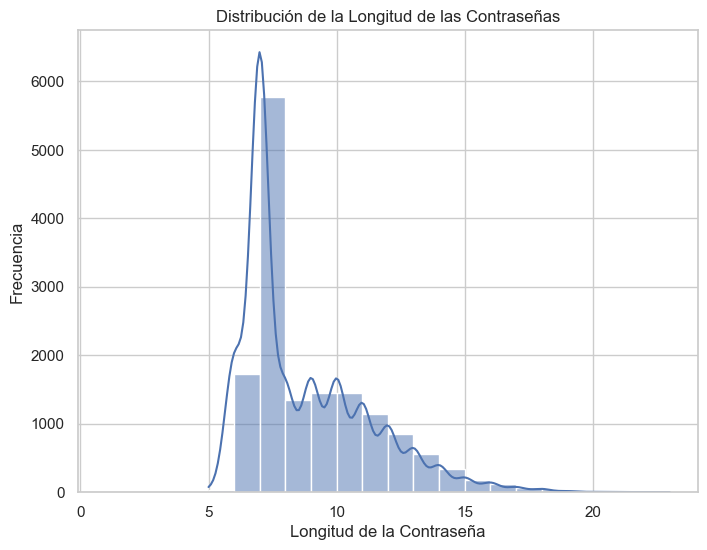

In [5]:
# Calcular la longitud de cada contraseña
passwords_df['length'] = passwords_df['password'].apply(len)

# Crear un histograma de las longitudes de las contraseñas
plt.figure(figsize=(8, 6))
sns.histplot(passwords_df['length'], bins=range(1, 21), kde=True)
plt.title('Distribución de la Longitud de las Contraseñas')
plt.xlabel('Longitud de la Contraseña')
plt.ylabel('Frecuencia')
plt.show()

En esta gráfica se presenta la relación entre la frecuencia y la longitud de las contraseñas en el conjunto de datos. Se observa que las contraseñas con una longitud de 6 caracteres son las más comunes, alcanzando una frecuencia de hasta 6,000 unidades. A continuación, las contraseñas de 6 caracteres tienen una frecuencia cercana a 2,000 unidades. Por otro lado, las contraseñas de 7 caracteres en adelante muestran frecuencias más bajas, llegando hasta las contraseñas de longitud 17-18, como se puede apreciar en la gráfica.



## Analizar Caracteres Especiales
Determinar el número de contraseñas que contienen caracteres especiales y visualizar su distribución.

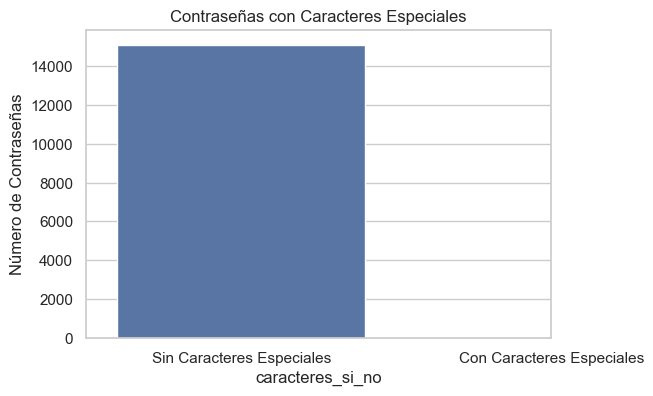

In [6]:
# Función para verificar caracteres especiales en las contraseñas
import re

def contains_special_chars(password):
    # Considera como especial cualquier carácter que no sea letra o dígito
    return bool(re.search(r'[^A-Za-z0-9]', password))

# Agregar una columna para indicar si una contraseña contiene caracteres especiales
passwords_df['caracteres_si_no'] = passwords_df['password'].apply(contains_special_chars)

# Contar y visualizar la ocurrencia de contraseñas con caracteres especiales
special_counts = passwords_df['caracteres_si_no'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=special_counts.index, y=special_counts.values)
plt.title('Contraseñas con Caracteres Especiales')
plt.xticks([0, 1], ['Sin Caracteres Especiales', 'Con Caracteres Especiales'])
plt.ylabel('Número de Contraseñas')
plt.show()


La gráfica presentada entonces muestra la distribución de contraseñas según la presencia o ausencia de caracteres especiales. Se ha realizado un análisis donde las contraseñas se dividen en dos categorías: aquellas que contienen caracteres especiales (por ejemplo, símbolos como "!", "@", "#", etc.) y aquellas que no los contienen, es decir, que solo están formadas por letras y números.

El resultado es claro: una gran mayoría de las contraseñas (más de 14,000) no contienen caracteres especiales, mientras que por otro lado no existen aquellas con caracteres especiales. Esto sugiere que, en el conjunto de datos analizado, las contraseñas que carecen de caracteres especiales son mucho más comunes, lo que puede implicar una menor complejidad y, potencialmente, menor seguridad en términos generales.

## Identificar Contraseñas Repetidas Unicamente la parte de {Contraseña}
Encuentra las contraseñas que aparecen más de una vez y visualiza las más repetidas.

In [7]:
# Identificar contraseñas repetidas
repeated_passwords = passwords_df['password'].value_counts()
repeated_passwords = repeated_passwords[repeated_passwords > 1]

# Imprimir el total de contraseñas repetidas
total_repeated_passwords = repeated_passwords.count()
print(f'Total de contraseñas repetidas: {total_repeated_passwords}')

# Ordenar las contraseñas de menos a más repetidas
repeated_passwords_sorted = repeated_passwords.sort_values(ascending=True)

# Mostrar las 40 contraseñas menos repetidas
print('Las 40 contraseñas repetidas, ordenadas de menos a más repetidas:')
print(repeated_passwords_sorted.head(40))

Total de contraseñas repetidas: 123
Las 40 contraseñas repetidas, ordenadas de menos a más repetidas:
password
especulador       2
Periódicamente    2
sonso             2
entamar           2
Sagitario         2
Peñasco           2
Ascensión         2
puesto            2
Panelista         2
Elucidar          2
Sobrealzar        2
Botero            2
repodridos        2
Ecuménico         2
Trombo            2
Pelásgico         2
fósforo           2
Huergo            2
posar&            2
analgésico        2
Acarreador        2
honradero         2
binocular         2
Embuste           2
Martha            2
apremiar          2
ferrita           2
agudización       2
rasero            2
ensamblador       2
turíbulo          2
c!ntur4           2
Dándonoslos       2
bacaladero        2
Samaná            2
peripato          2
mantellina!       2
demencia          2
Demarcar          2
contiguo          2
Name: count, dtype: int64


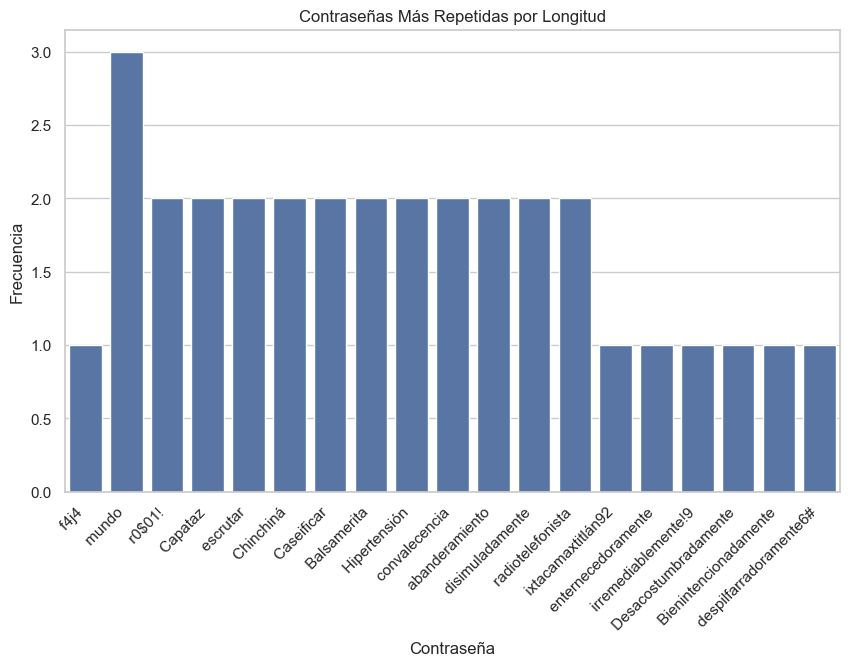

In [8]:
# Identificar las contraseñas repetidas
repeated_passwords = passwords_df['password'].value_counts().reset_index()
repeated_passwords.columns = ['password', 'frequency']

# Agregar una columna de longitud
repeated_passwords['length'] = repeated_passwords['password'].apply(len)

# Encontrar la contraseña más repetida para cada longitud
top_repeated_by_length = repeated_passwords.loc[repeated_passwords.groupby('length')['frequency'].idxmax()]

# Visualizar las contraseñas más repetidas por longitud
plt.figure(figsize=(10, 6))
sns.barplot(x='password', y='frequency', data=top_repeated_by_length)
plt.title('Contraseñas Más Repetidas por Longitud')
plt.xlabel('Contraseña')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

En la imagen se puede observar un análisis de contraseñas repetidas dentro de un conjunto de datos. El código identifica las contraseñas que aparecen más de una vez y presenta las más repetidas por longitud de contraseña.

Aqui por tanto podemos observar que las contraseñas más largar tienen muy pocas repeticiones, mientras a medida que reducimos el tamaño de ellas observamos una mayor repetición.

## Analizar el Tiempo de Ejecución
Visualiza el tiempo de ejecución para cada método de cracking utilizado en el proceso.

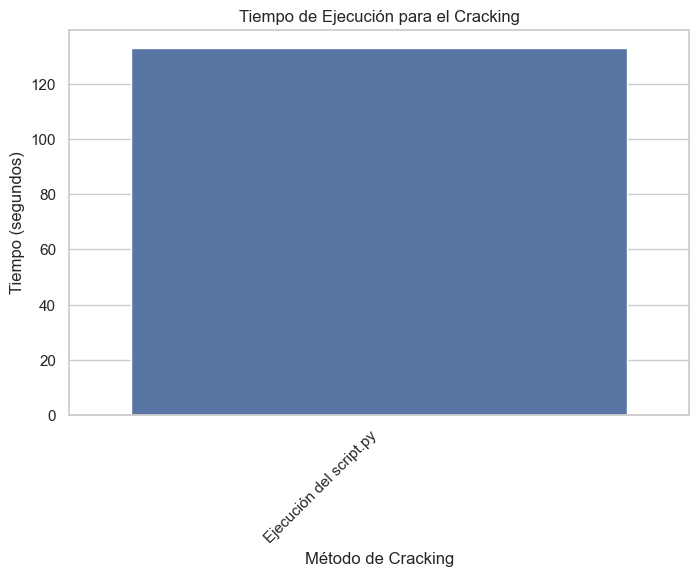

In [10]:
# Datos de ejemplo para los tiempos de ejecución de cada comando (a ser reemplazados por tiempos reales)
execution_data = {
    'Método': ['Ejecución del script.py'],
    'Tiempo (segundos)': [133]
}

# Crear DataFrame y graficar los tiempos de ejecución
execution_df = pd.DataFrame(execution_data)
plt.figure(figsize=(8, 5))
sns.barplot(x='Método', y='Tiempo (segundos)', data=execution_df)
plt.title('Tiempo de Ejecución para el Cracking')
plt.xlabel('Método de Cracking')
plt.ylabel('Tiempo (segundos)')
plt.xticks(rotation=45, ha='right')
plt.show()
